In [3]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Setup Data
from utils.data import X, y_log
from utils.visualization import plot_decisions


%matplotlib inline

## Parameter Tuning

In [4]:
learning_rate_range = [0.001, 0.003, 0.01, 0.03]
max_depth_range = [2, 5, 7, 9]
n_estimators_range = [x*5 for x in range(30, 50)]

In [5]:
grid_search = GridSearchCV(
    xgb.XGBRegressor(),
    param_grid={"learning_rate": learning_rate_range,
                "max_depth": max_depth_range,
                "n_estimators": n_estimators_range},
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
)

In [6]:
grid_search.fit(X, y_log)

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.001, 0.003, 0.01, 0.03], 'max_depth': [2, 5, 7, 9], 'n_estimators': [150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [7]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [8]:
grid_search.best_score_

-1.103665744565138

## Visualize Decisions

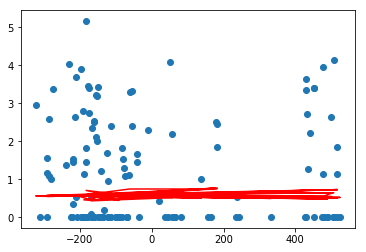

In [9]:
plot_decisions(grid_search.best_estimator_, X, y_log)